# **Half-life**

## Background

The decay of radioactive atoms occurs at a constant rate; it does not depend on the number of atoms present. Thus, the amount of radioactive atoms at any time is undergoing a consistent, continuous change. It is not possible to predict when a specific nucleus will decay. However, when a very large ensemble of $N$ atoms of a specific radioisotope are present, it is possible to predict the probability that one of the nuclei will decay in an infinitesimal increment of time. The probability of decay per unit time, $dN/dt$, is proportional to the number of radioactive nuclei present:
$$
\frac{dN}{dt}=-\lambda N\tag{1}
$$
where $λ$ is the decay constant; a characteristic of the particular radioisotope. The number of decays per second, $dN/dt$, is also known as the activity, $A$.

Solving the differential equation (1) leads to the equation describing the exponential decrease in activity as a function of time:
$$
A=A_{0}e^{-\lambda t}\tag{2}
$$
where $A_{0}$ is the activity at $t=0$. The activity can be measured in units of disintegrations per second (dps), Becquerels, or Curies (Ci). One Becquerel is one disintegration per second and 1 Curie is equivalent to $3.7 x 10^{10}$ disintegrations per second.
When the half-life, $T_{1/2}$, of the radioisotope is defined as the time it takes for the activity to decrease to $1/2$ of its former value, $λ$ can be replaced by:
$$
\lambda =\frac{0.693}{T_{1/2}}\tag{3}
$$
The Geiger counter employed in this experiment intercepts only a fraction of the radiation emitted by the radioactive source, because of the small solid angle subtended and the efficiency of the detector. However, the true counting rate, r, is still proportional to the activity:
$$
r=r_{0}e^{-\frac{0.693}{T_{1/2}}t}\tag{4}
$$
where $r_{0}$ is the counting rate at time $t = 0$.
Solving equation 4 for $T_{1/2}$ gives:
$$
T_{1/2}=\frac{-0.693t}{ln(\frac{r}{r_{0}})}\tag{5}
$$

Most of the isotopes you will encounter in everyday life have half lives long enough that the change in their decay rate is not readily apparent. In this lab, we will generate a short lived isotope through the use of a barium generator. When cesium-137 decays it emits a beta particle and transforms to barium-137. In about 85% of these decays, the barium is left in an excited state, barium-137m which has a short half life and decays by emitting a gamma ray to the ground state of barium-137.

The barium-137 generator contains cesium-137 in an ion-exchange medium. When an eluting solution consisting of weak acid is passed through this ion exchange column, the barium is washed out leaving the cesium behind. The solution containing the barium can then be used as a source of a short-lived radionuclide for experiments. Similar generators are used in the production of short-lived medical isotopes, such as Tc-99m, in hospitals.


## **Equipment**

*   ST-365B Counter with GM Tube and stand
*   [Spectrum Techniques Software](https://www.spectrumtechniques.com/software-downloads/)
*   Barium generator

## **Precaution**
[Review the Istotope Generator Data Sheet](https://cdn.gotopeo.com/content/uploads/2015/12/05083800/Isotope-Generator-PEOnised-Datasheet.pdf)



## **Procedure**

1. Turn on the detector and set the voltage to 900 V.  
2. Go to the Preset menu to preset the Time to 15 and Runs to 2.
3. Perform a 30 second count with no source to determine the background.
4. Go to the Preset menu to preset the Time to 30 and Runs to 22.
5. Obtain a Ba-137m source and place it in the second shelf.
6. Begin collecting data.
7. Save the data.

## Data Analysis


1. Make corrections for dead time. Plot the natural log of count rate vs. time.

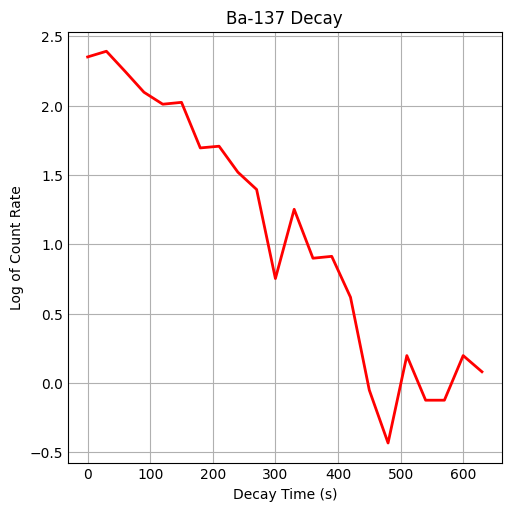

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stat

# Dead time for the detector determined earlier
T_d=3.8*10**-4 # seconds

# Set the data collection time in seconds
count_time=30

# Import data for Source Counts
data = pd.read_csv('HalfLife.csv')

# Convert the Background Count Rate from Counts per Minute to Counts Per Second
background_rate=340/60

# Convert Count Rate data to Counts per Second
count_rate=(data['Counts'])/(count_time)

# Create an array of the times each count starts
t_counts=np.arange(0,count_time*len(data['Counts']),count_time)

# Create empty arrays for the dead time corrected count rate and log count rate
corrected_rate=[]
log_rate=[]

# For loop to correct each count for dead time and write it to the the arrays
for i in range(0, len(data['Counts'])):
  cr=(count_rate[i])/(1-count_rate[i]*T_d)-background_rate
  lr=math.log(cr)
  corrected_rate.append(cr)
  log_rate.append(lr)

# Select the data to be plotted
x = t_counts
y = log_rate

# Set the plot style
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
plt.style.use('_mpl-gallery')
ax.set_title("Ba-137 Decay")
ax.set_xlabel('Decay Time (s)')
ax.set_ylabel('Log of Count Rate')

# Create a line plot of the data
ax.plot(x, y, linewidth=2.0, color='red')

# Create the plot
plt.show()

8. Use equation (5) to determine the half-life of Ba-137m.

In [ ]:
## Determine the half life


[  0  30  60  90 120 150 180 210 240 270 300 330 360 390 420 450 480 510
 540 570 600 630]


In [ ]:
# Define a function to compute the half life from the counting rate, r at time,
# t based on the counting rate at time=0 (r0)
def T_half(t,r,r0):
    return math.log(1/2)*t/math.log(r/r0)

# Compute the meaured half life for each count
half_life=[]
for j in range(1, len(count_rate)):
  hl=T_half(t_counts[j]-15,corrected_rate[j],corrected_rate[0])
  half_life.append(hl)

# Print the average measured half life
print(stat.mean(half_life))


162.47081038059224
